In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [3]:
chatelet_df = pd.read_csv('/home/hala/Downloads/qualite-de-lair-mesuree-dans-la-station-chatelet.csv', sep = ';', parse_dates = True)
auber_df = pd.read_csv('/home/hala/Downloads/qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv', sep = ';', parse_dates = True)
roosevelt_df = pd.read_csv('/home/hala/Downloads/qualite-de-lair-mesuree-dans-la-station-auber.csv', sep = ';', parse_dates = True)


In [4]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,ND,ND,43,508,"18,2","49,1"
1,2022-10-10T01:00:00+02:00,ND,ND,45,529,"18,5","48,4"
2,2022-10-10T00:00:00+02:00,ND,ND,42,547,"18,8","47,1"
3,2022-10-09T23:00:00+02:00,ND,ND,59,614,"19,1","47,2"
4,2022-10-09T22:00:00+02:00,ND,ND,65,637,"19,4","46,3"
...,...,...,...,...,...,...,...
85432,2013-01-01T06:00:00+01:00,4,26,102,622,"21,2","45,9"
85433,2013-01-01T05:00:00+01:00,3,25,85,715,"21,6","45,8"
85434,2013-01-01T04:00:00+01:00,4,27,124,799,"21,8",47
85435,2013-01-01T03:00:00+01:00,6,30,166,800,"21,6","47,3"


In [5]:
roosevelt_df

,DATE/HEURE,NO,NO2,PM10,PM2.5,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,28,56,103,35,509,"21,7","43,7"
1,2022-10-10T01:00:00+02:00,29,58,108,41,518,"21,8","43,1"
2,2022-10-10T00:00:00+02:00,28,58,140,52,533,22,"42,9"
3,2022-10-09T23:00:00+02:00,27,57,113,41,570,"22,1","43,1"
4,2022-10-09T22:00:00+02:00,15,53,138,49,588,"22,4","42,2"
...,...,...,...,...,...,...,...,...
84539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
auber_df

,date/heure,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10T02:00:00+02:00,33,58,58,522,"21,3",44
1,2022-10-10T01:00:00+02:00,53,63,48,540,"21,5","43,3"
2,2022-10-10T00:00:00+02:00,31,62,39,551,"21,6","42,6"
3,2022-10-09T23:00:00+02:00,21,63,31,542,21,"44,7"
4,2022-10-09T22:00:00+02:00,10,48,30,532,"20,8","45,2"
...,...,...,...,...,...,...,...
85432,2013-01-01T06:00:00+01:00,27,57,15,464,15,"63,3"
85433,2013-01-01T05:00:00+01:00,27,56,22,481,"14,9","63,7"
85434,2013-01-01T04:00:00+01:00,22,52,45,490,"14,9","63,3"
85435,2013-01-01T03:00:00+01:00,43,61,18,536,"14,9",65


Questions
Here is a list of relevant questions that can be tackled by analyzing the published data. feel free to ask more
questions or reformulate these ones.
. Predict CO2 level in a selected station from time of day, past values, temperature and humidity.
. Predict NO/NO2/PM10 levels (+PM25 for Auber) in a selected station from past values, temperature
and humidity. Does it help to also consider current CO2 level?
. Compare models for each stations.
. Can current levels in two stations help predict levels in third station?
. Can surface air quality data help predict NO/NO2/PM10/PM25 levels in subway stations?

In [7]:
chatelet_df.set_index('DATE/HEURE', inplace = True)

In [8]:
chatelet_df = chatelet_df.apply(lambda x: x.replace('ND',np.NaN))
auber_df = auber_df.apply(lambda x: x.replace('ND',np.NaN))
roosevelt_df = roosevelt_df.apply(lambda x: x.replace('ND',np.NaN))

In [9]:
auber_df.dropna(axis = 0, how = 'all', inplace = True)

In [10]:
roosevelt_df.dropna(axis = 0, how = 'all', inplace = True)

In [11]:
auber_df.set_index('date/heure', inplace = True)


In [12]:
roosevelt_df.set_index('DATE/HEURE', inplace = True)


In [13]:
auber_df.columns

Index(['NO', 'NO2', 'PM10', 'CO2', 'TEMP', 'HUMI'], dtype='object')

In [14]:
roosevelt_df.columns

Index(['NO', 'NO2', 'PM10', 'PM2.5', 'CO2', 'TEMP', 'HUMI'], dtype='object')

In [15]:
chatelet_df.isna().sum()

NO      28296
NO2     19504
PM10    15330
CO2     15722
TEMP    10712
HUMI    10711
dtype: int64

<AxesSubplot: ylabel='DATE/HEURE'>

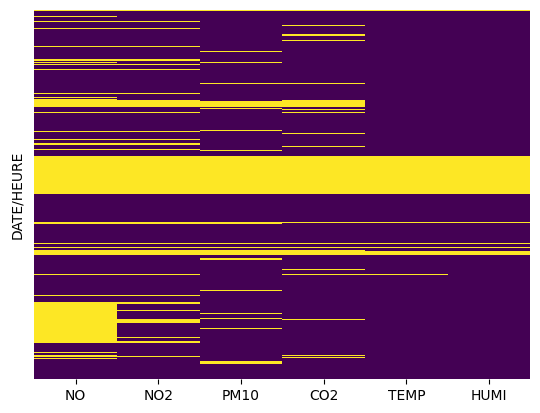

In [16]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
chatelet_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot: ylabel='DATE/HEURE'>

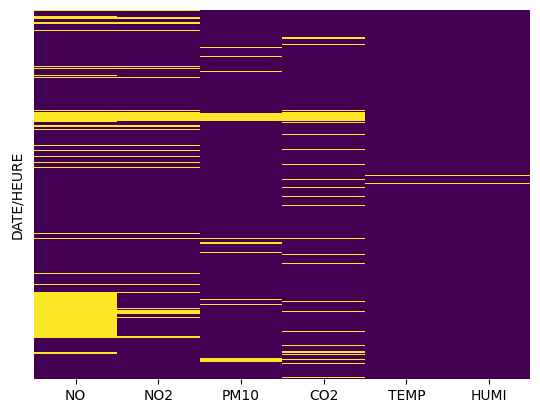

In [18]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: ylabel='date/heure'>

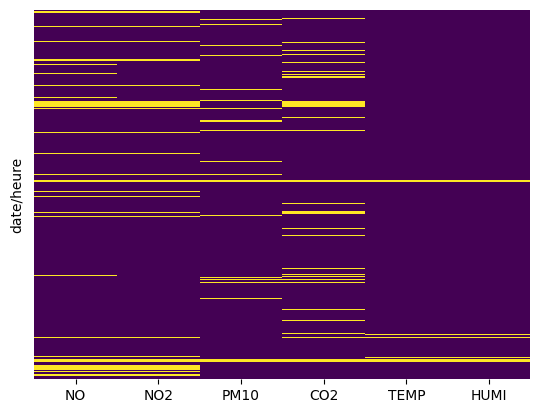

In [19]:
sns.heatmap(auber_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot: ylabel='DATE/HEURE'>

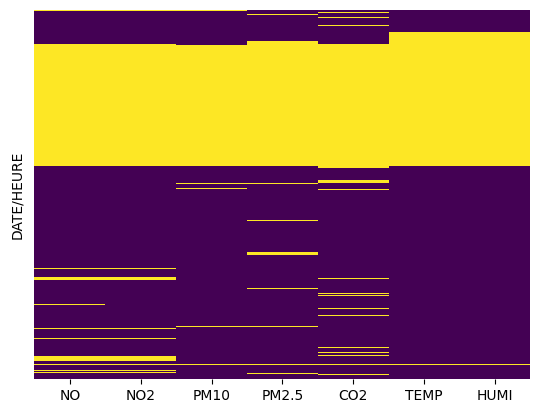

In [20]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
roosevelt_df.dropna(axis = 0, how = 'all', inplace = True)

<AxesSubplot: ylabel='DATE/HEURE'>

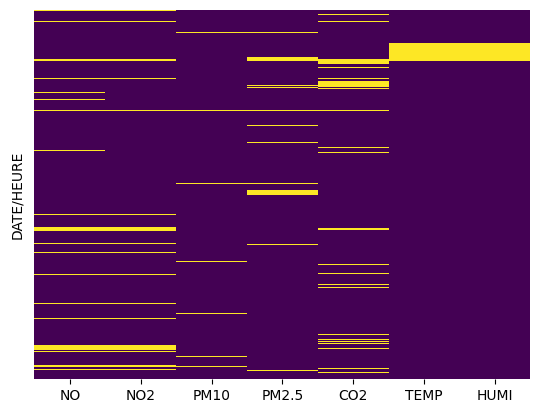

In [22]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
chatelet_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot: ylabel='DATE/HEURE'>

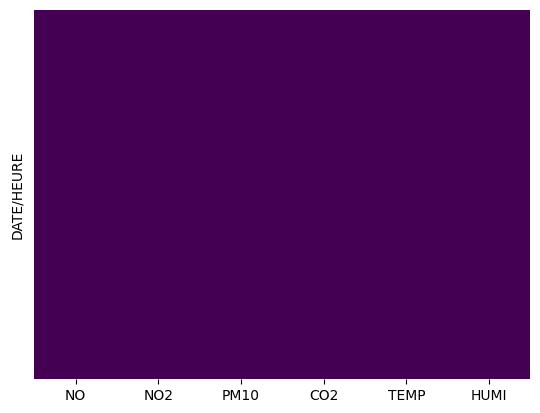

In [24]:
sns.heatmap(chatelet_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
auber_df.fillna(method = 'bfill', inplace = True)

In [26]:
roosevelt_df.fillna(method = 'bfill', inplace = True)

<AxesSubplot: ylabel='DATE/HEURE'>

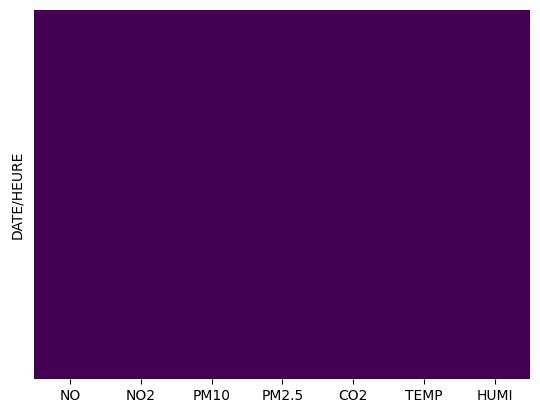

In [27]:
sns.heatmap(roosevelt_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
chatelet_df.dtypes

NO      object
NO2     object
PM10    object
CO2     object
TEMP    object
HUMI    object
dtype: object

In [29]:
chatelet_df['HUMI'] = chatelet_df['HUMI'].apply(lambda x: x.replace(',','.'))
chatelet_df['TEMP'] = chatelet_df['TEMP'].apply(lambda x: x.replace(',','.'))

In [30]:
chatelet_df['TEMP'] = chatelet_df['TEMP'].astype(float)
chatelet_df['HUMI'] = chatelet_df['HUMI'].astype(float)


In [31]:
chatelet_df['NO2'] = chatelet_df['NO2'].apply(lambda x: x.replace('<',''))

In [32]:
chatelet_df['NO2'] = chatelet_df['NO2'].astype(float)


In [33]:
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('>',''))
chatelet_df['PM10'] = chatelet_df['PM10'].apply(lambda x: x.replace('<',''))

In [34]:
chatelet_df['PM10'] = chatelet_df['PM10'].astype(float)


In [35]:
chatelet_df['CO2'] = chatelet_df['CO2'].astype(float)


In [36]:
chatelet_df['NO'] = chatelet_df['NO'].apply(lambda x: x.replace('<',''))

In [37]:
chatelet_df['NO'] = chatelet_df['NO'].astype(float)


In [38]:
chatelet_df

,NO,NO2,PM10,CO2,TEMP,HUMI
DATE/HEURE,,,,,,
2022-10-10T02:00:00+02:00,5.0,7.0,43.0,508.0,18.2,49.1
2022-10-10T01:00:00+02:00,5.0,7.0,45.0,529.0,18.5,48.4
2022-10-10T00:00:00+02:00,5.0,7.0,42.0,547.0,18.8,47.1
2022-10-09T23:00:00+02:00,5.0,7.0,59.0,614.0,19.1,47.2
2022-10-09T22:00:00+02:00,5.0,7.0,65.0,637.0,19.4,46.3
...,...,...,...,...,...,...
2013-01-01T06:00:00+01:00,4.0,26.0,102.0,622.0,21.2,45.9
2013-01-01T05:00:00+01:00,3.0,25.0,85.0,715.0,21.6,45.8
2013-01-01T04:00:00+01:00,4.0,27.0,124.0,799.0,21.8,47.0


In [39]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

In [40]:
auber_df.index = pd.to_datetime(auber_df.index, utc = True)


In [41]:
chatelet_df.index = pd.to_datetime(chatelet_df.index, utc = True)


In [42]:
roosevelt_df.index = pd.to_datetime(roosevelt_df.index, utc = True)

In [43]:
chatelet_df.dtypes

NO      float64
NO2     float64
PM10    float64
CO2     float64
TEMP    float64
HUMI    float64
dtype: object

In [44]:
chatelet_df = chatelet_df.reset_index()
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3
...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3


In [45]:
chatelet_df['date'] = pd.to_datetime(chatelet_df['DATE/HEURE'], errors='coerce').dt.date
chatelet_df['time'] = pd.to_datetime(chatelet_df['DATE/HEURE'], errors='coerce').dt.time

In [46]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1,2022-10-10,00:00:00
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4,2022-10-09,23:00:00
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1,2022-10-09,22:00:00
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2,2022-10-09,21:00:00
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3,2022-10-09,20:00:00
...,...,...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,2013-01-01,05:00:00
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,2013-01-01,04:00:00
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,2013-01-01,03:00:00
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2013-01-01,02:00:00


In [47]:
chatelet_df.dtypes

DATE/HEURE    datetime64[ns, UTC]
NO                        float64
NO2                       float64
PM10                      float64
CO2                       float64
TEMP                      float64
HUMI                      float64
date                       object
time                       object
dtype: object

In [48]:
chatelet_df['year'] = pd.to_datetime(chatelet_df['DATE/HEURE']).dt.year

In [49]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1,2022-10-10,00:00:00,2022
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4,2022-10-09,23:00:00,2022
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1,2022-10-09,22:00:00,2022
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2,2022-10-09,21:00:00,2022
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3,2022-10-09,20:00:00,2022
...,...,...,...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,2013-01-01,05:00:00,2013
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,2013-01-01,04:00:00,2013
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,2013-01-01,03:00:00,2013
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2013-01-01,02:00:00,2013


In [50]:
chatelet_df.groupby(['year']).count()

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time
year,,,,,,,,,
2013,8699,8699,8699,8699,8699,8699,8699,8699,8699
2014,8747,8747,8747,8747,8747,8747,8747,8747,8747
2015,8620,8620,8620,8620,8620,8620,8620,8620,8620
2016,7410,7410,7410,7410,7410,7410,7410,7410,7410
2017,7837,7837,7837,7837,7837,7837,7837,7837,7837
2018,945,945,945,945,945,945,945,945,945
2019,8672,8672,8672,8672,8672,8672,8672,8672,8672
2020,8777,8777,8777,8777,8777,8777,8777,8777,8777
2021,8550,8550,8550,8550,8550,8550,8550,8550,8550


In [51]:
chatelet_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year
0,2022-10-10 00:00:00+00:00,5.0,7.0,43.0,508.0,18.2,49.1,2022-10-10,00:00:00,2022
1,2022-10-09 23:00:00+00:00,5.0,7.0,45.0,529.0,18.5,48.4,2022-10-09,23:00:00,2022
2,2022-10-09 22:00:00+00:00,5.0,7.0,42.0,547.0,18.8,47.1,2022-10-09,22:00:00,2022
3,2022-10-09 21:00:00+00:00,5.0,7.0,59.0,614.0,19.1,47.2,2022-10-09,21:00:00,2022
4,2022-10-09 20:00:00+00:00,5.0,7.0,65.0,637.0,19.4,46.3,2022-10-09,20:00:00,2022
...,...,...,...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,2013-01-01,05:00:00,2013
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,2013-01-01,04:00:00,2013
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,2013-01-01,03:00:00,2013
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2013-01-01,02:00:00,2013


In [52]:
grouped_df=chatelet_df[chatelet_df['year'] < 2017]

In [53]:
grouped_df=grouped_df[grouped_df['year'] >= 2013]

In [54]:
grouped_df

,DATE/HEURE,NO,NO2,PM10,CO2,TEMP,HUMI,date,time,year
41474,2016-12-31 00:00:00+00:00,70.0,37.0,102.0,535.0,14.9,34.4,2016-12-31,00:00:00,2016
41475,2016-12-30 23:00:00+00:00,79.0,36.0,117.0,597.0,15.4,34.9,2016-12-30,23:00:00,2016
41476,2016-12-30 22:00:00+00:00,90.0,41.0,123.0,622.0,15.2,35.2,2016-12-30,22:00:00,2016
41477,2016-12-30 21:00:00+00:00,96.0,41.0,131.0,666.0,15.6,35.6,2016-12-30,21:00:00,2016
41478,2016-12-30 20:00:00+00:00,114.0,45.0,170.0,754.0,15.4,37.2,2016-12-30,20:00:00,2016
...,...,...,...,...,...,...,...,...,...,...
74945,2013-01-01 05:00:00+00:00,4.0,26.0,102.0,622.0,21.2,45.9,2013-01-01,05:00:00,2013
74946,2013-01-01 04:00:00+00:00,3.0,25.0,85.0,715.0,21.6,45.8,2013-01-01,04:00:00,2013
74947,2013-01-01 03:00:00+00:00,4.0,27.0,124.0,799.0,21.8,47.0,2013-01-01,03:00:00,2013
74948,2013-01-01 02:00:00+00:00,6.0,30.0,166.0,800.0,21.6,47.3,2013-01-01,02:00:00,2013


In [55]:
nn=grouped_df.copy()

In [56]:
#Predicting 

In [57]:
nn.drop(['DATE/HEURE','NO','NO2','PM10','time','year'],axis=1,inplace=True)

In [58]:
nn

,CO2,TEMP,HUMI,date
41474,535.0,14.9,34.4,2016-12-31
41475,597.0,15.4,34.9,2016-12-30
41476,622.0,15.2,35.2,2016-12-30
41477,666.0,15.6,35.6,2016-12-30
41478,754.0,15.4,37.2,2016-12-30
...,...,...,...,...
74945,622.0,21.2,45.9,2013-01-01
74946,715.0,21.6,45.8,2013-01-01
74947,799.0,21.8,47.0,2013-01-01
74948,800.0,21.6,47.3,2013-01-01


In [59]:
n=pd.DataFrame(nn.groupby(['date']).mean())

In [60]:
n.reset_index(names=['date'],inplace=True)

In [61]:
n

,date,CO2,TEMP,HUMI
0,2013-01-01,645.739130,21.013043,41.191304
1,2013-01-02,640.958333,20.345833,38.325000
2,2013-01-03,644.791667,20.908333,48.595833
3,2013-01-04,610.500000,21.037500,45.145833
4,2013-01-05,558.125000,20.441667,44.612500
...,...,...,...,...
1399,2016-12-27,576.541667,17.104167,40.616667
1400,2016-12-28,589.041667,16.754167,38.708333
1401,2016-12-29,620.541667,16.075000,37.383333
1402,2016-12-30,671.916667,15.487500,37.483333


In [62]:
def window_input(window_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < window_length:
        df[f'x_{i}'] = df['CO2'].shift(+i)
        i = i + 1
        
    if i == window_length:
        df['y'] = df['CO2'].shift(+i)
        
    # Drop rows where there is a NaN
    df = df.dropna(axis=0)
        
    return df

In [63]:
new_df = window_input(10, n)

In [64]:
new_df

,date,CO2,TEMP,HUMI,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,y
10,2013-01-11,610.166667,19.712500,39.187500,612.041667,597.291667,550.208333,568.875000,513.333333,558.125000,610.500000,644.791667,640.958333,645.739130
11,2013-01-12,599.833333,19.587500,38.445833,610.166667,612.041667,597.291667,550.208333,568.875000,513.333333,558.125000,610.500000,644.791667,640.958333
12,2013-01-13,500.000000,18.375000,37.145833,599.833333,610.166667,612.041667,597.291667,550.208333,568.875000,513.333333,558.125000,610.500000,644.791667
13,2013-01-14,532.958333,17.087500,30.562500,500.000000,599.833333,610.166667,612.041667,597.291667,550.208333,568.875000,513.333333,558.125000,610.500000
14,2013-01-15,517.666667,17.212500,35.891667,532.958333,500.000000,599.833333,610.166667,612.041667,597.291667,550.208333,568.875000,513.333333,558.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,2016-12-27,576.541667,17.104167,40.616667,547.791667,483.041667,532.666667,605.458333,605.958333,561.791667,569.000000,550.625000,549.375000,616.916667
1400,2016-12-28,589.041667,16.754167,38.708333,576.541667,547.791667,483.041667,532.666667,605.458333,605.958333,561.791667,569.000000,550.625000,549.375000
1401,2016-12-29,620.541667,16.075000,37.383333,589.041667,576.541667,547.791667,483.041667,532.666667,605.458333,605.958333,561.791667,569.000000,550.625000
1402,2016-12-30,671.916667,15.487500,37.483333,620.541667,589.041667,576.541667,547.791667,483.041667,532.666667,605.458333,605.958333,561.791667,569.000000


In [74]:
new_df.drop(['TEMP','HUMI'],axis=1,inplace=True)

In [96]:
from sklearn.model_selection import train_test_split

X = new_df[['CO2', 'x_1', 'x_2', 'x_3', 'x_4']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_5 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)


dt_reg_5.fit(X_train, y_train)

dt_reg_5_pred = dt_reg_5.predict(X_test)

In [98]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_5 = GradientBoostingRegressor(random_state=42)

gbr_5.fit(X_train, y_train.ravel())

gbr_5_pred = gbr_5.predict(X_test)

In [99]:
baseline_pred = []

for row in X_test:
    baseline_pred.append(np.mean(row))

In [100]:
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

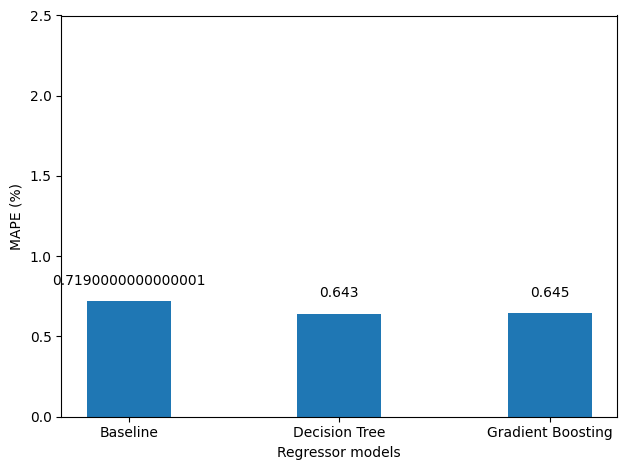

In [101]:
baseline_mape = mape(y_test, baseline_pred)
dt_5_mape = mape(y_test, dt_reg_5_pred)
gbr_5_mape = mape(y_test, gbr_5_pred)
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_5_mape, gbr_5_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 2.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')
    
plt.tight_layout()

In [ ]:
bb

In [102]:
from sklearn.model_selection import train_test_split

X = new_df[['CO2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6','x_7','x_8','x_9']].values
y = new_df['y'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [103]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_5 = GradientBoostingRegressor(random_state=42)

gbr_5.fit(X_train, y_train.ravel())

gbr_5_pred = gbr_5.predict(X_test)

In [104]:
from sklearn.tree import DecisionTreeRegressor
dt_reg_5 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)


dt_reg_5.fit(X_train, y_train)

dt_reg_5_pred = dt_reg_5.predict(X_test)

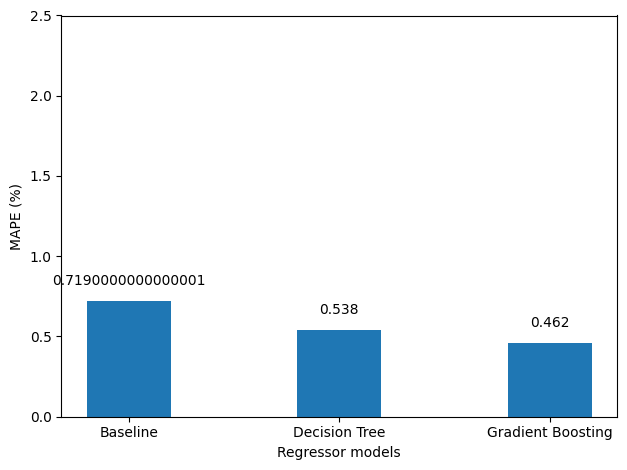

In [105]:
baseline_mape = mape(y_test, baseline_pred)
dt_5_mape = mape(y_test, dt_reg_5_pred)
gbr_5_mape = mape(y_test, gbr_5_pred)
# Generate the bar plot
fig, ax = plt.subplots()

x = ['Baseline', 'Decision Tree', 'Gradient Boosting']
y = [baseline_mape, dt_5_mape, gbr_5_mape]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Regressor models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 2.5)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 0.1, s=str(value), ha='center')
    
plt.tight_layout()

In [ ]:
#Predict the next time step using a sequence of past observations


In [130]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    
    df = data.copy()
    
    i = 1
    while i < input_length:
        df[f'x_{i}'] = df['CO2'].shift(-i)
        i = i + 1
        
    j = 0
    while j < output_length:
        df[f'y_{j}'] = df['CO2'].shift(-output_length-j)
        j = j + 1
        
    df = df.dropna(axis=0)
    
    return df

In [ ]:
#26 observations are used as predictors for the next 26 time steps.

In [131]:
seq_df1 = window_input_output(26, 1, n)

In [132]:
seq_df1.drop(['TEMP','HUMI'],axis=1,inplace=True)


In [133]:
seq_df1.drop(['date'],axis=1,inplace=True)

In [134]:
seq_df1

,CO2,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_17,x_18,x_19,x_20,x_21,x_22,x_23,x_24,x_25,y_0
0,645.739130,640.958333,644.791667,610.500000,558.125000,513.333333,568.875000,550.208333,597.291667,612.041667,...,704.666667,678.583333,635.791667,669.583333,674.333333,672.541667,682.250000,657.208333,687.916667,640.958333
1,640.958333,644.791667,610.500000,558.125000,513.333333,568.875000,550.208333,597.291667,612.041667,610.166667,...,678.583333,635.791667,669.583333,674.333333,672.541667,682.250000,657.208333,687.916667,618.291667,644.791667
2,644.791667,610.500000,558.125000,513.333333,568.875000,550.208333,597.291667,612.041667,610.166667,599.833333,...,635.791667,669.583333,674.333333,672.541667,682.250000,657.208333,687.916667,618.291667,674.458333,610.500000
3,610.500000,558.125000,513.333333,568.875000,550.208333,597.291667,612.041667,610.166667,599.833333,500.000000,...,669.583333,674.333333,672.541667,682.250000,657.208333,687.916667,618.291667,674.458333,692.791667,558.125000
4,558.125000,513.333333,568.875000,550.208333,597.291667,612.041667,610.166667,599.833333,500.000000,532.958333,...,674.333333,672.541667,682.250000,657.208333,687.916667,618.291667,674.458333,692.791667,686.333333,513.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,705.958333,644.250000,583.541667,652.541667,712.875000,515.333333,485.000000,601.041667,648.666667,550.166667,...,550.625000,569.000000,561.791667,605.958333,605.458333,532.666667,483.041667,547.791667,576.541667,644.250000
1375,644.250000,583.541667,652.541667,712.875000,515.333333,485.000000,601.041667,648.666667,550.166667,576.708333,...,569.000000,561.791667,605.958333,605.458333,532.666667,483.041667,547.791667,576.541667,589.041667,583.541667
1376,583.541667,652.541667,712.875000,515.333333,485.000000,601.041667,648.666667,550.166667,576.708333,601.000000,...,561.791667,605.958333,605.458333,532.666667,483.041667,547.791667,576.541667,589.041667,620.541667,652.541667
1377,652.541667,712.875000,515.333333,485.000000,601.041667,648.666667,550.166667,576.708333,601.000000,613.583333,...,605.958333,605.458333,532.666667,483.041667,547.791667,576.541667,589.041667,620.541667,671.916667,712.875000


In [144]:

from sklearn.model_selection import train_test_split

X = seq_df1[['CO2', 'x_1', 'x_2', 'x_3', 'x_4','x_5','x_6','x_7','x_8','x_9','x_10', 'x_11', 'x_12', 'x_13','x_14','x_15','x_16','x_17','x_18','x_19', 'x_20', 'x_21', 'x_22','x_23','x_24','x_25']].values
y = seq_df1['y_0'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [148]:
dt_seq = DecisionTreeRegressor(random_state=42)

dt_seq.fit(X_train, y_train)

dt_seq_preds = dt_seq.predict(X_test)